In [ ]:
'''
What is Counter Approximation:
    - Aims to simplify a polyline by reducing its vertices given a threshold value
    - Contour approximation, which uses the Ramer–Douglas–Peucker (RDP) algorithm
    - Here we take a curve and reduce its number of vertices while retaining the bulk of its shape
    - It removes all redundant points and compresses the contour, thereby saving memory.

In [ ]:
'''
Contour Approximation Method
    - CHAIN_APPROX_SIMPLE
    - CHAIN_APPROX_NONE

### Contour Approximation

336


(-0.5, 631.5, 507.5, -0.5)

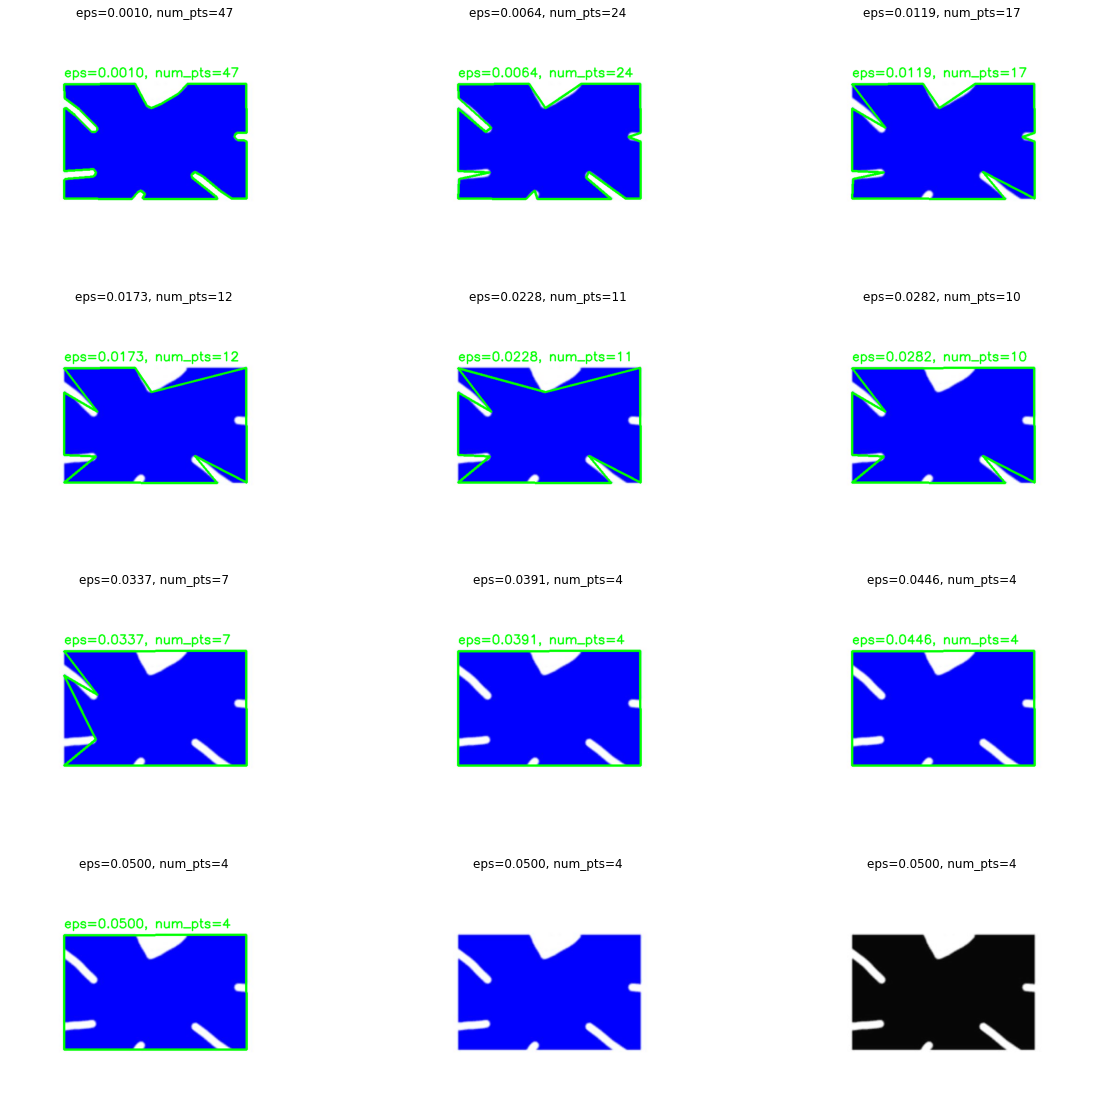

In [1]:
import numpy as np
import cv2
import imutils

# load the image and display it
image = cv2.imread("img/2.jpg")

# convert the image to grayscale and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY_INV)[1]

# find the largest contour in the threshold image

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

print(len(c))

output = image.copy()

cv2.drawContours(output, [c], -1, (0, 255, 0), 3)

(x, y, w, h) = cv2.boundingRect(c)

text = "original, num_pts={}".format

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=4,ncols=3,figsize=(20,20))

index = [[x,y] for x in range(0,4) for y in range(0,3)]

count = -1
# to demonstrate the impact of contour approximation, let's loop
# over a number of epsilon sizes
for eps in np.linspace(0.001, 0.05, 10):
    count = count+1
    
    # approximate the contour
    peri = cv2.arcLength(c, True)
    
    approx = cv2.approxPolyDP(c, eps * peri, True)
    
    # draw the approximated contour on the image
    output = image.copy()
    
    cv2.drawContours(output, [approx], -1, (0, 255, 0), 3)
    
    text = "eps={:.4f}, num_pts={}".format(eps, len(approx))
    cv2.putText(output, text, (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX,0.9, (0, 255, 0), 2)

    # show the approximated contour image
    i = index[count][0]
    j = index[count][1]
    
    plt.sca(ax[i,j]); 
    plt.imshow(output,cmap="gray"); 
    plt.title(text)
    plt.axis("off")
    

plt.sca(ax[3,1]); 
plt.imshow(image,cmap="gray"); 
plt.title(text)
plt.axis("off")

plt.sca(ax[3,2]); 
plt.imshow(gray,cmap="gray"); 
plt.title(text)
plt.axis("off")